In [115]:
import pandas as pd
import numpy as np
#pd.set_option('display.notebook_repr_html',True)f
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from roc import plot_roc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier




%matplotlib inline

In [28]:
df = pd.read_csv('data/churn.csv')
df.head()

  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null bool
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: bool(1), float64(8), int64(8), object(4)
memory usage: 524.1+ KB


In [29]:
d = {'yes': True, 'no': False}
df["Int'l Plan"] = df["Int'l Plan"].apply(lambda x: True if x == 'yes' else False)
df.head()

  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657      False        yes   
1    OH             107        415  371-7191      False        yes   
2    NJ             137        415  358-1921      False         no   
3    OH              84        408  375-9999       True         no   
4    OK              75        415  330-6626       True         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0    

In [30]:
df["VMail Plan"] = df["VMail Plan"].apply(lambda x: True if x == 'yes' else False)

In [31]:
del df['Phone']

In [50]:
df.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [35]:
df["Churn?"] = df["Churn?"].apply(lambda x: True if x == 'True.' else False)

In [37]:
del df['State']

In [52]:
df.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [43]:
df2 = df.copy()
df2.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [44]:
del df2['Area Code']

In [45]:
X = np.array(df2)

In [47]:
df2.values

array([[128, False, True, ..., 3, 2.7, 1],
       [107, False, True, ..., 3, 3.7, 1],
       [137, False, False, ..., 5, 3.29, 0],
       ..., 
       [28, False, False, ..., 6, 3.81, 2],
       [184, True, False, ..., 10, 1.35, 2],
       [74, False, True, ..., 4, 3.7, 0]], dtype=object)

In [48]:
y

array([False, False, False, ..., False, False, False], dtype=bool)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.93703148425787108

In [56]:
confusion_matrix(y_test, rf.predict(X_test))

array([[561,   5],
       [ 37,  64]])

In [59]:
precision_score(y_test, rf.predict(X_test))

0.92753623188405798

In [60]:
recall_score(y_test, rf.predict(X_test))

0.63366336633663367

In [61]:
rf = RandomForestClassifier(oob_score = True)
rf.fit(X_train, y_train)
print rf.oob_score_
print rf.score(X_test, y_test)

0.930607651913
0.943028485757


/Users/gstudent/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [62]:
rf.feature_importances_

array([ 0.03310884,  0.06730759,  0.02809193,  0.02078178,  0.1051069 ,
        0.03405256,  0.17497218,  0.07895391,  0.02983292,  0.06624184,
        0.03644462,  0.02576947,  0.04355347,  0.04084189,  0.04954041,
        0.04664342,  0.11875629])

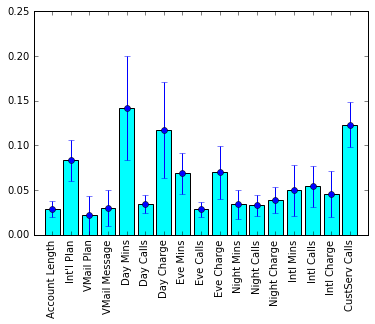

In [160]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
feature_list = []
for i in xrange(len(df2.columns)):
    feature_list.append(rf.estimators_[i].feature_importances_)
    
feature_list_T = map(list, zip(*feature_list))

std_list = []
for feature in feature_list_T:
    std_list.append(np.std(feature))

zip(std_list, df2.columns)

y_err = std_list

plt.bar(range(len(df2.columns)), rf.feature_importances_, align='center', color='cyan')
plt.errorbar(range(len(df2.columns)), rf.feature_importances_, y_err, fmt='o', color='blue')
plt.xlim(-1,17)
plt.ylim(0)
plt.xticks(range(len(df2.columns)), df2.columns, rotation='vertical')
plt.show()

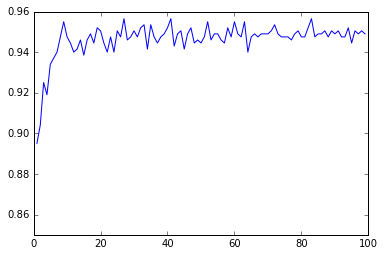

In [83]:
tree_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100, 250]#, 250, 500, 1000]
score_list = []
for i in xrange(1,100):#tree_list:
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    score_list.append(rf.score(X_test, y_test))

plt.plot(range(1,100), score_list)
plt.ylim(.85,.96)
plt.show()

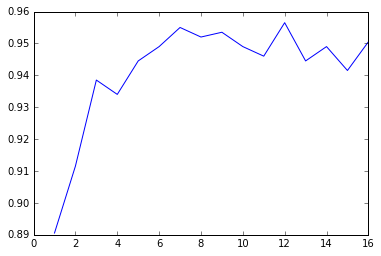

In [85]:
score_list = []
for i in xrange(1,len(df2.columns)):#tree_list:
    rf = RandomForestClassifier(max_features=i)
    rf.fit(X_train, y_train)
    score_list.append(rf.score(X_test, y_test))

plt.plot(range(1,len(df2.columns)), score_list)
#plt.ylim(.85,.96)
plt.show()

RF:  acc=0.955022488756 	prec=0.949367088608 		rec=0.742574257426


/Users/gstudent/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/gstudent/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


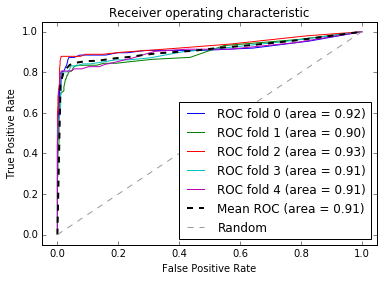

RF_def:  acc=0.937031484258 	prec=0.940298507463 		rec=0.623762376238
DT:  acc=0.925037481259 	prec=0.757575757576 		rec=0.742574257426


/Users/gstudent/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/gstudent/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


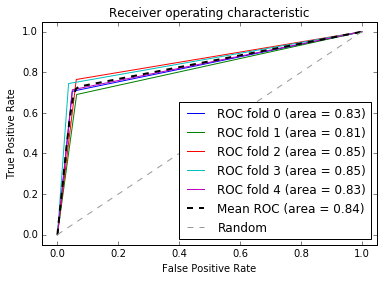

kNN: acc=0.877061469265 	prec=0.702127659574 		rec=0.326732673267


/Users/gstudent/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/gstudent/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


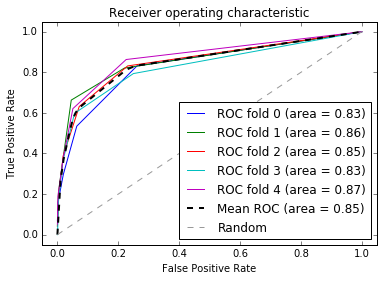

Log: acc=0.848575712144 	prec=0.5 			rec=0.118811881188


/Users/gstudent/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/gstudent/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


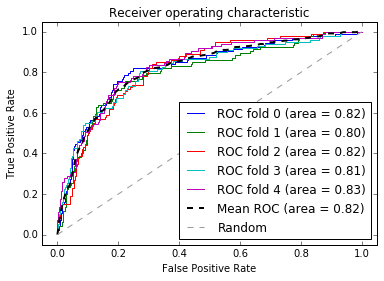

In [117]:
rf = RandomForestClassifier(max_features=7, n_estimators=50)
rf.fit(X_train, y_train)
print "RF:  acc={} \tprec={} \t\trec={}".format(rf.score(X_test, y_test), 
                                          precision_score(y_test, rf.predict(X_test)),
                                          recall_score(y_test, rf.predict(X_test)))

plot_roc(X, y, RandomForestClassifier, n_estimators=50)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print "RF_def:  acc={} \tprec={} \t\trec={}".format(rf.score(X_test, y_test), 
                                          precision_score(y_test, rf.predict(X_test)),
                                          recall_score(y_test, rf.predict(X_test)))
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

print "DT:  acc={} \tprec={} \t\trec={}".format(dt.score(X_test, y_test), 
                                          precision_score(y_test, dt.predict(X_test)),
                                          recall_score(y_test, dt.predict(X_test)))

plot_roc(X, y, DecisionTreeClassifier)

print "kNN: acc={} \tprec={} \t\trec={}".format(knn.score(X_test, y_test),
                                          precision_score(y_test, knn.predict(X_test)),
                                          recall_score(y_test, knn.predict(X_test)))

plot_roc(X, y, KNeighborsClassifier)

print "Log: acc={} \tprec={} \t\t\trec={}".format(log_model.score(X_test, y_test),
                                          precision_score(y_test, log_model.predict(X_test)),
                                          recall_score(y_test, log_model.predict(X_test)))


plot_roc(X, y, LogisticRegression)

